In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']
mRNA_peak_file = doc["mRNA_peak_file"]

tss_annotation = doc['tss_annotation']


import os

import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *
import helper
import create_output
print('Number of tissues: ',len(tissues))



('Number of tissues: ', 13)


In [1]:
cmd = "annotatePeaks.pl Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d Results/merged/tags_TSS_merged > Results/Figures/Figure3/alt/A.exp.nopc.hist"
print(cmd)
!{cmd}

annotatePeaks.pl Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d Results/merged/tags_TSS_merged > Results/Figures/Figure3/alt/A.exp.nopc.hist

	Using Custom Genome
	Peak file = Results/output/TSS1.exp.bed
	Genome = GCF_003668045.1_CriGri-PICR_genomic.fna
	Organism = unknown
	Custom annotation GFF file: /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 (better to get GTF file)
	Fragment Length set to 1
	Peak Region set to 4000
	-----------------------------------------------------
	Histogram mode activated (bin size = 25 bp)
	-----------------------------------------------------
	Tag Directories:
		Results/merged/tags_TSS_merged
	Peak/BED file conversion summary:
		BED/Header formatted lines: 30775
		peakfile formatted lines: 0
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Peaks: 30775
		Redundant

In [2]:
cmd = "annotatePeaks.pl Results/Figures/Figure3/A.TSS1_mrna /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d Results/merged/tags_TSS_merged > Results/Figures/Figure3/alt/A.TSS1_mrna.nopc.hist"
print(cmd)
!{cmd}

annotatePeaks.pl Results/Figures/Figure3/A.TSS1_mrna /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d Results/merged/tags_TSS_merged > Results/Figures/Figure3/alt/A.TSS1_mrna.nopc.hist

	Using Custom Genome
	Peak file = Results/Figures/Figure3/A.TSS1_mrna
	Genome = GCF_003668045.1_CriGri-PICR_genomic.fna
	Organism = unknown
	Custom annotation GFF file: /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 (better to get GTF file)
	Fragment Length set to 1
	Peak Region set to 4000
	-----------------------------------------------------
	Histogram mode activated (bin size = 25 bp)
	-----------------------------------------------------
	Tag Directories:
		Results/merged/tags_TSS_merged
	Peak/BED file conversion summary:
		BED/Header formatted lines: 20637
		peakfile formatted lines: 0
		Duplicated Peak IDs: 0

	Peak File Statistics:
		Total Pe

1.92312352234
[-16.11136521  16.4823364 ]
Max value: 3.84624704469
Full-width at half-maximum: 32.5937016074 (nts)
1.1030248195
[-11.8690987   64.30992461]
Max value: 2.206049639
Full-width at half-maximum: 76.1790233096 (nts)


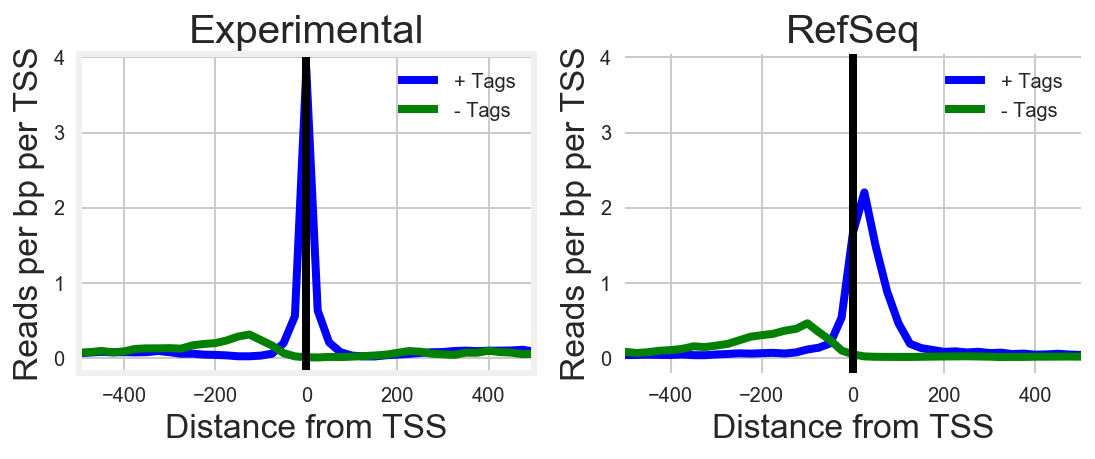

In [6]:
output_file_exp = "Results/Figures/Figure3/alt/A.exp.nopc.hist"
output_file_mrna = "Results/Figures/Figure3/alt/A.TSS1_mrna.nopc.hist"
hist_save= "Results/Figures/Figure3/alt/A.combine.png"
wrap_hist_plot([output_file_exp ,
                output_file_mrna ], hist_save,
                    names=["Experimental","RefSeq"])

In [2]:
## Create RefSeq peak file for this
peak_f = "Results/output/TSS1.exp.bed"
meta_f = "Results/output/TSS1.exp.meta"
save_f = "Results/Figures/Figure3/alt/A.TSS1_mrna"
tag_f = "Results/merged/tags_TSS_merged"

#mrna_filt = "Results/Figures/Figure3/A.mrna"
create_output.exp_bed_to_refseq(peak_f,meta_f,refseq_f=mRNA_peak_file,save_f=save_f,is_unique=True)

0        1        2  \
3                                                                  
p1@Bmp4_XM_027386529.1          NW_020822366.1   722307   722309   
p1@Bmp4_XM_027386528.1          NW_020822366.1   724609   724611   
p1@Cdkn3_XM_027386531.1         NW_020822366.1  1085434  1085436   
p1@Cnih1_XM_027386534.1         NW_020822366.1  1114412  1114414   
p1@Cgrrf1_XM_027386536.1        NW_020822366.1  1159882  1159884   
p1@Samd4a_XM_027386537.1        NW_020822366.1  1214840  1214842   
p1@Samd4a_XM_027386539.1        NW_020822366.1  1333155  1333157   
p1@Gch1_XM_027386540.1          NW_020822366.1  1513794  1513796   
p1@Wdhd1_XM_027386542.1         NW_020822366.1  1605102  1605104   
p1@Socs4_XM_027386543.1         NW_020822366.1  1605291  1605293   
p1@Mapk1ip1l_XM_027386545.1     NW_020822366.1  1634569  1634571   
p1@Lgals3_XM_027386548.1        NW_020822366.1  1718834  1718836   
p1@Dlgap5_XM_027386547.1        NW_020822366.1  1759926  1759928   
p1@Dlgap5_XM_027386546.1        NW_020822366.1  1765500  1765502   
p1@Atg14_XM_027386553.1         NW_020822366.1  1915209  1915211   
p1@Ktn1_XM_027386554.1          NW_020822366.1  1981600  1981602   
p1@LOC100768260_XM_027386564.1  NW_020822366.1  2440071  2440073   
p1@LOC100768260_XM_027386567.1  NW_020822366.1  2440074  2440076   
p1@Tmem260_XM_027386568.1       NW_020822366.1  2801532  2801534   
p1@Exoc5_XM_027386571.1         NW_020822366.1  3417724  3417726   
p1@Ap5m1_XM_027386573.1         NW_020822366.1  3418098  3418100   
p1@Naa30_XM_027386575.1         NW_020822366.1  3518348  3518350   
p1@Naa30_XM_027386574.1         NW_020822366.1  3518525  3518527   
p1@Ccdc198_XM_027386577.1       NW_020822366.1  3595926  3595928   
p1@LOC100772688_XM_027386580.1  NW_020822366.1  4117228  4117230   
p1@Ttc5_XM_027386585.1          NW_020822366.1  4746158  4746160   
p1@Parp2_XM_027386589.1         NW_020822366.1  4772546  4772548   
p1@Tep1_XM_027386592.1          NW_020822366.1  4842495  4842497   
p1@Osgep_XM_027386596.1         NW_020822366.1  4903304  4903306   
p1@Osgep_XM_027386600.1         NW_020822366.1  4901611  4901613   
...                                        ...      ...      ...   
p1@Snrpn_XM_027434099.1         NW_020823558.1    69028    69030   
p1@Twistnb_XM_027434130.1       NW_020823586.1    49205    49207   
p1@LOC113831730_XM_027434132.1  NW_020823587.1    14923    14925   
p1@LOC100753890_XM_027434150.1  NW_020823602.1    24365    24367   
p1@LOC113838541_XM_027434168.1  NW_020823627.1    44150    44152   
p1@LOC113838538_XM_027434165.1  NW_020823627.1    45116    45118   
p1@LOC113838538_XM_027434162.1  NW_020823627.1    45268    45270   
p1@LOC113838537_XM_027434161.1  NW_020823627.1    62529    62531   
p1@LOC113838542_XM_027434169.1  NW_020823627.1    64626    64628   
p1@LOC100769620_XM_027434174.1  NW_020823629.1    62786    62788   
p1@LOC100769912_XM_027434173.1  NW_020823629.1    71809    71811   
p1@LOC113831691_XM_027434189.1  NW_020823639.1     7380     7382   
p1@LOC100757478_XM_027434222.1  NW_020823676.1    29505    29507   
p1@LOC113831730_XM_027434333.1  NW_020823792.1    24752    24754   
p1@LOC113838852_XM_027434360.1  NW_020823819.1    10068    10070   
p1@LOC113838855_XM_027434367.1  NW_020823819.1    37334    37336   
p1@LOC113838897_XM_027434403.1  NW_020823856.1    11267    11269   
p1@LOC107977194_XM_027434428.1  NW_020823876.1    33406    33408   
p1@LOC100751996_XM_027434444.1  NW_020823898.1    37436    37438   
p1@LOC113838952_XM_027434451.1  NW_020823908.1     4464     4466   
p1@LOC113838972_XM_027434460.1  NW_020823928.1    19891    19893   
p1@LOC113838971_XM_027434459.1  NW_020823928.1    20895    20897   
p1@LOC113839006_XM_027434479.1  NW_020823970.1     3417     3419   
p1@LOC113839031_XM_027434493.1  NW_020824001.1    38201    38203   
p1@LOC113839047_XM_027434508.1  NW_020824030.1    41013    41015   
p1@LOC113839066_XM_027434527.1  NW_020824056.1     5213     5215   
p1@LOC113839076_XM_027434536.1  N

('output histogram exp', 'Results/Figures/Figure3/alt/A.exp.hist')
annotatePeaks.pl Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -d Results/merged/tags_TSS_merged -pc 0 > Results/Figures/Figure3/alt/A.exp.hist
annotatePeaks.pl Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d Results/merged/tags_TSS_merged -pc 0 > Results/Figures/Figure3/alt/A.exp.histNorm
annotatePeaks.pl Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -ghist -d Results/merged/tags_TSS_merged -pc 0 -strand + > Results/Figur

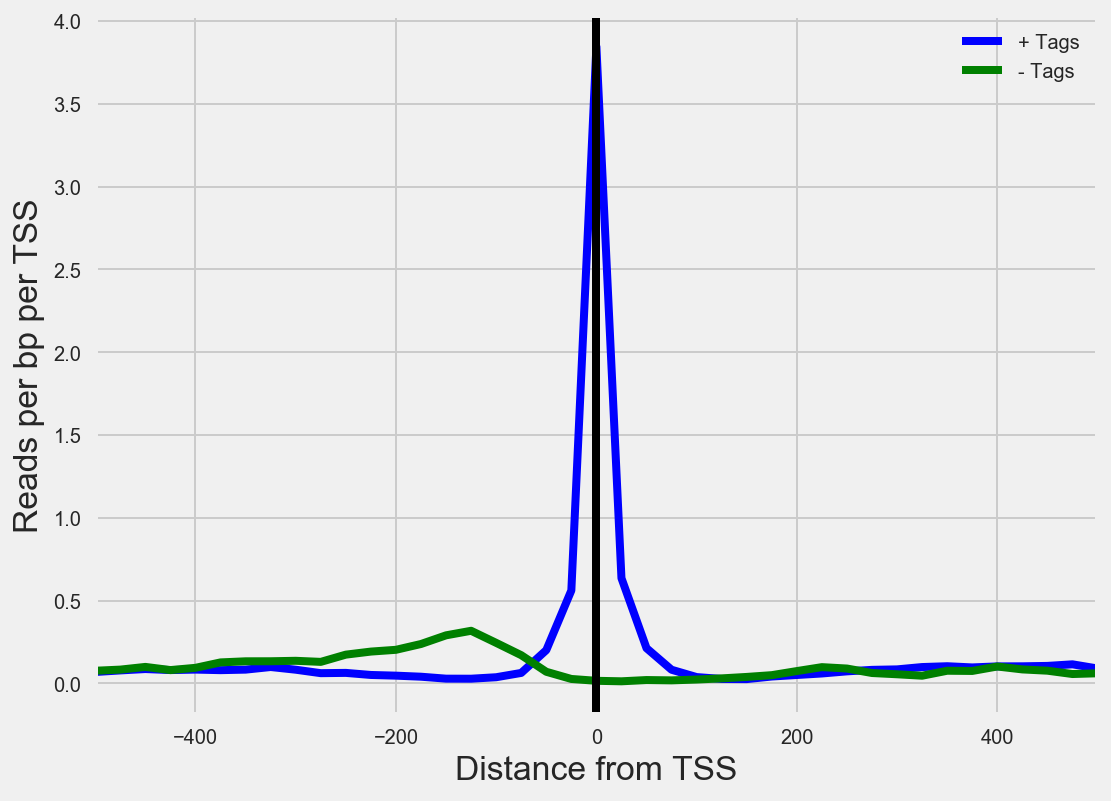

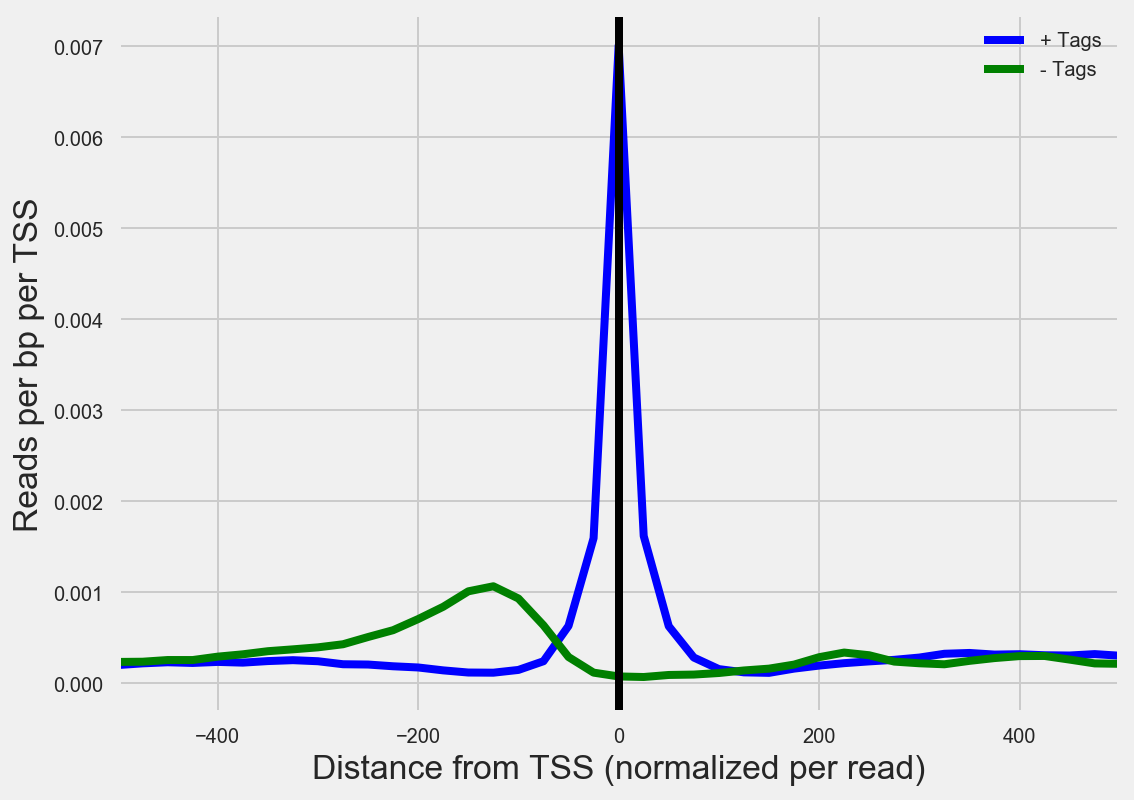

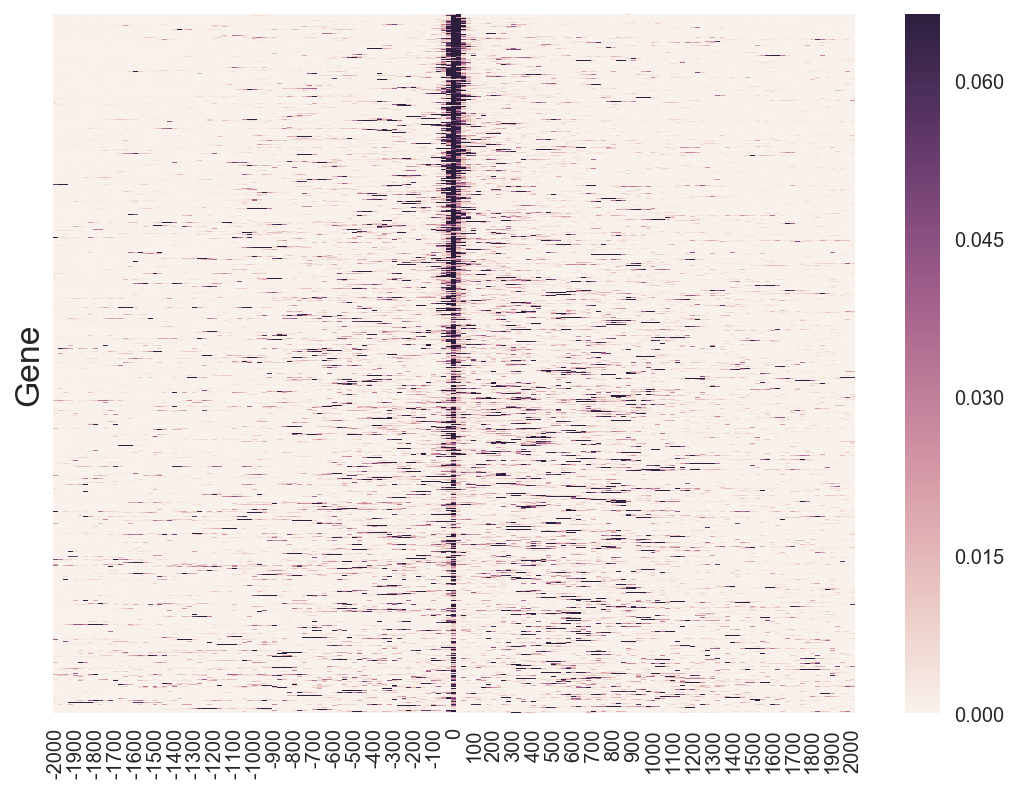

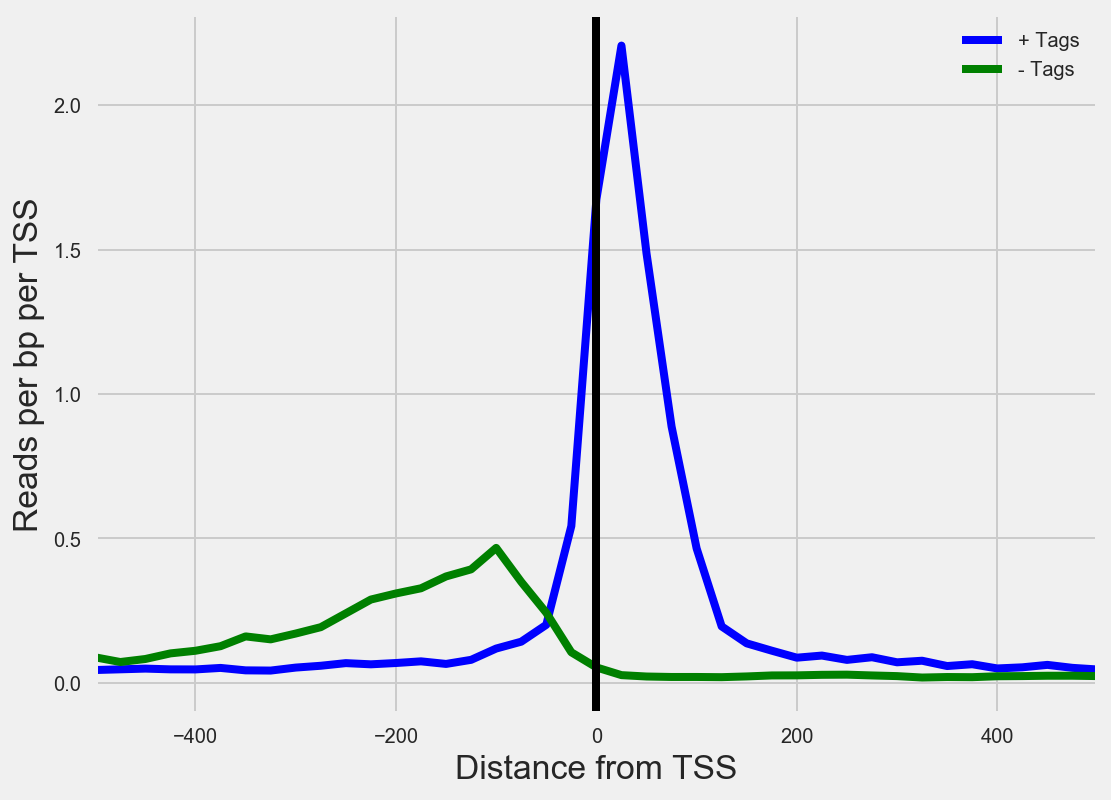

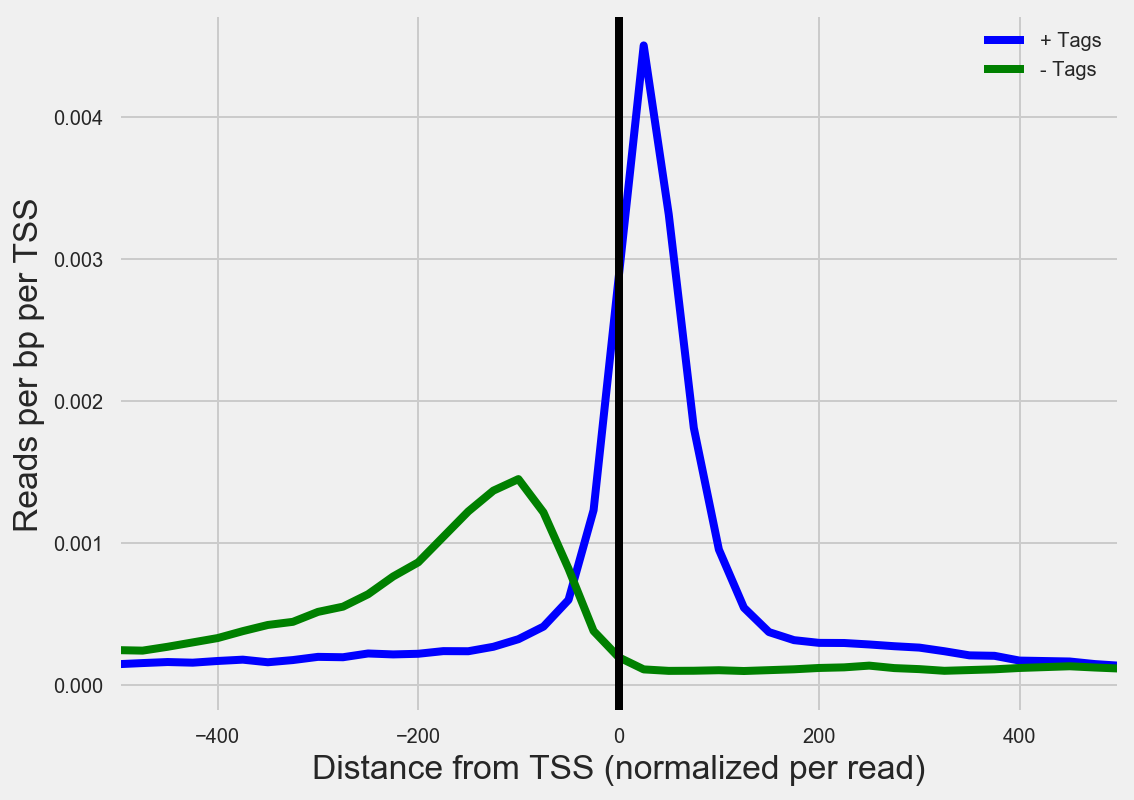

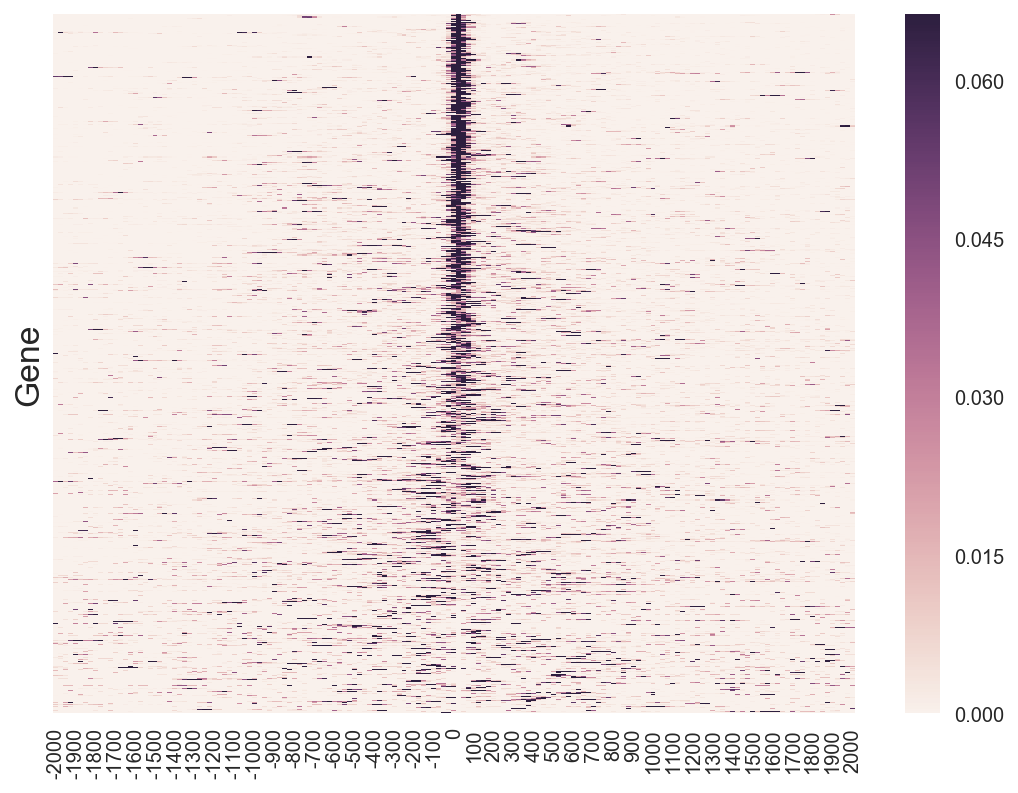

In [4]:

# Experimental 
output_file_exp = "Results/Figures/Figure3/alt/A.exp.hist"
print('output histogram exp',output_file_exp)
hist(tag_f,output_file_exp,ref_fa,anno_gff,mode='peak',peak=peak_f,region=4000,res=25,pc=0)
hist_plot(output_file_exp)
heat_df = heat_plot(output_file_exp+'MatS',save_f = output_file_exp + '.heat.png' )

# Refseq 
output_file_mrna = "Results/Figures/Figure3/alt/A.TSS1_mrna.hist"
input_file_mrna = save_f
print('output histogram mrna',output_file_mrna)
hist(tag_f,output_file_mrna,ref_fa,anno_gff,mode='peak',peak=save_f,region=4000,res=25,pc=0)
hist_plot(output_file_mrna)
heat_df = heat_plot(output_file_mrna+'MatS',save_f = output_file_mrna + '.heat.png' )


1.92312352234
[-16.11136521  16.4823364 ]
Max value: 3.84624704469
Full-width at half-maximum: 32.5937016074 (nts)
1.1030248195
[-11.8690987   64.30992461]
Max value: 2.206049639
Full-width at half-maximum: 76.1790233096 (nts)


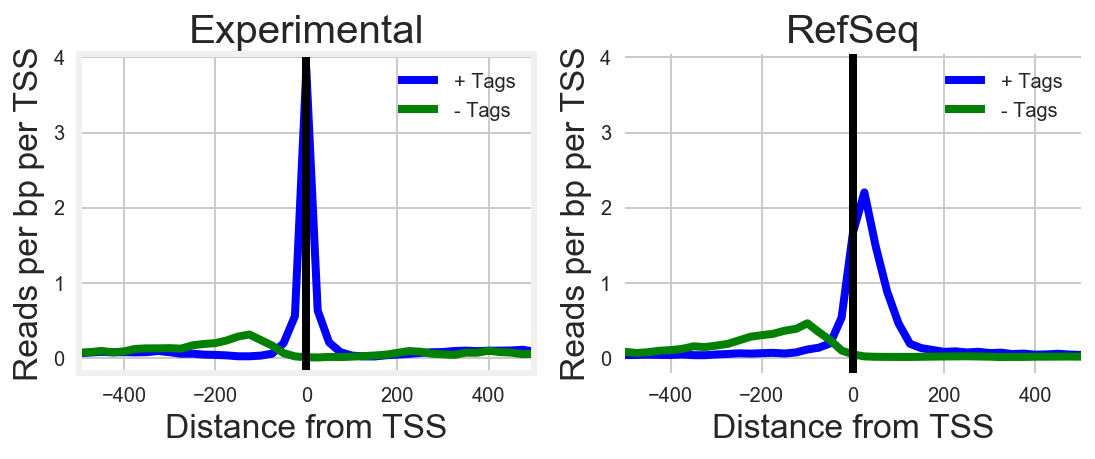

In [5]:
output_file_exp = "Results/Figures/Figure3/alt/A.exp.hist"
output_file_mrna = "Results/Figures/Figure3/alt/A.TSS1_mrna.hist"

wrap_hist_plot([output_file_exp ,
                output_file_mrna ], hist_save="Results/Figures/Figure3/alt/A.combine.png",
                    names=["Experimental","RefSeq"])

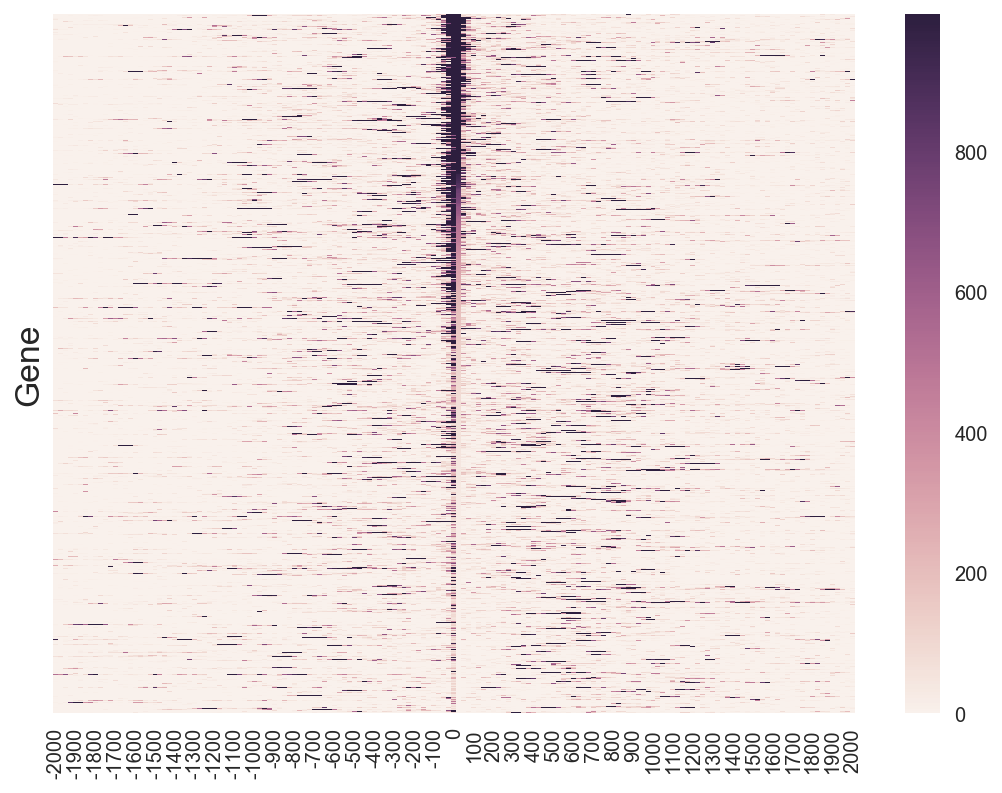

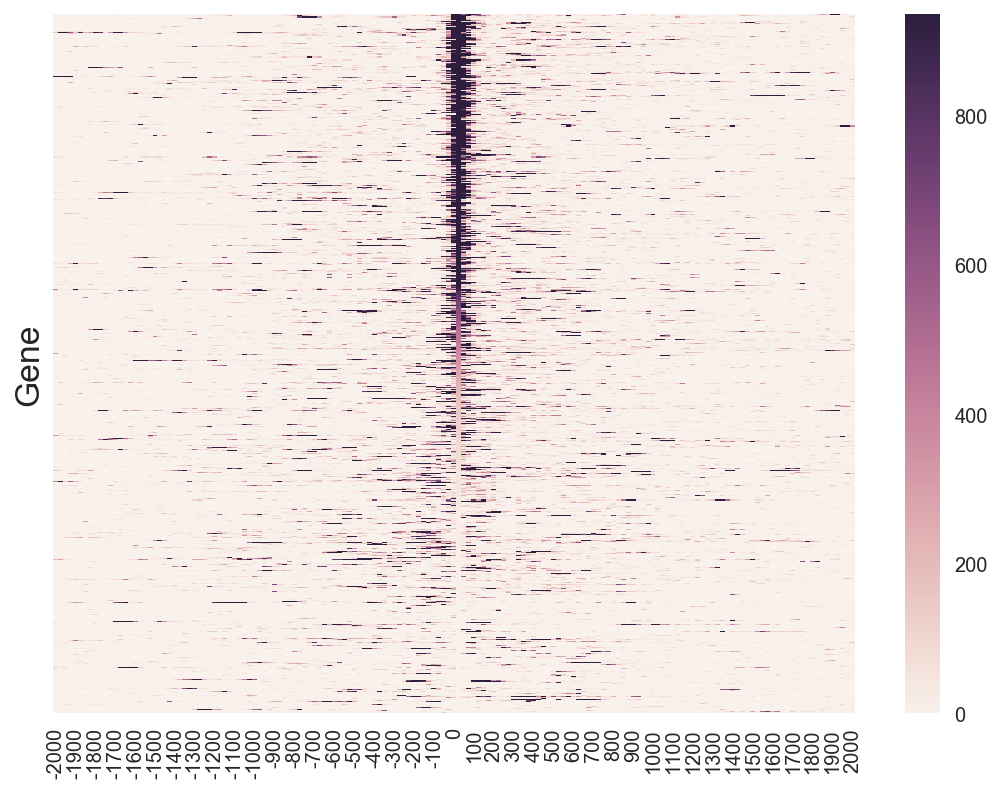

In [6]:
## Run without normalization
heat_df = heat_plot(output_file_exp+'MatS',is_norm=False,save_f = output_file_exp + '.noNorm.heat.png' )
heat_df = heat_plot(output_file_mrna+'MatS',is_norm=False,save_f = output_file_mrna + '.noNorm.heat.png' )

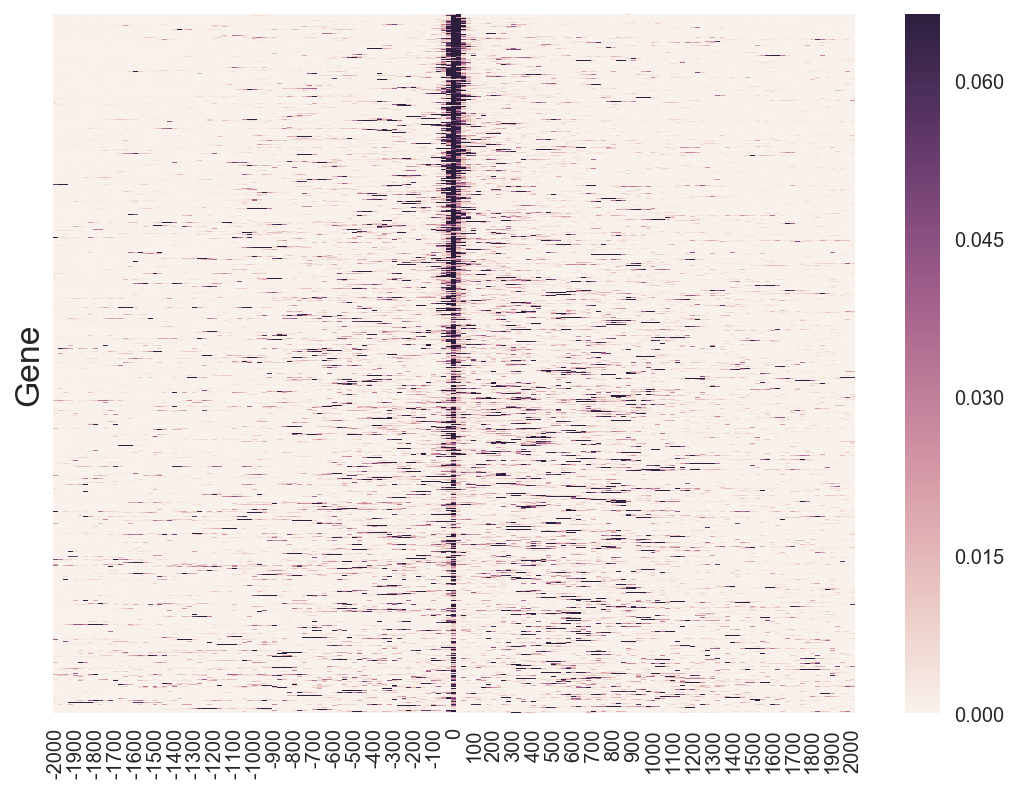

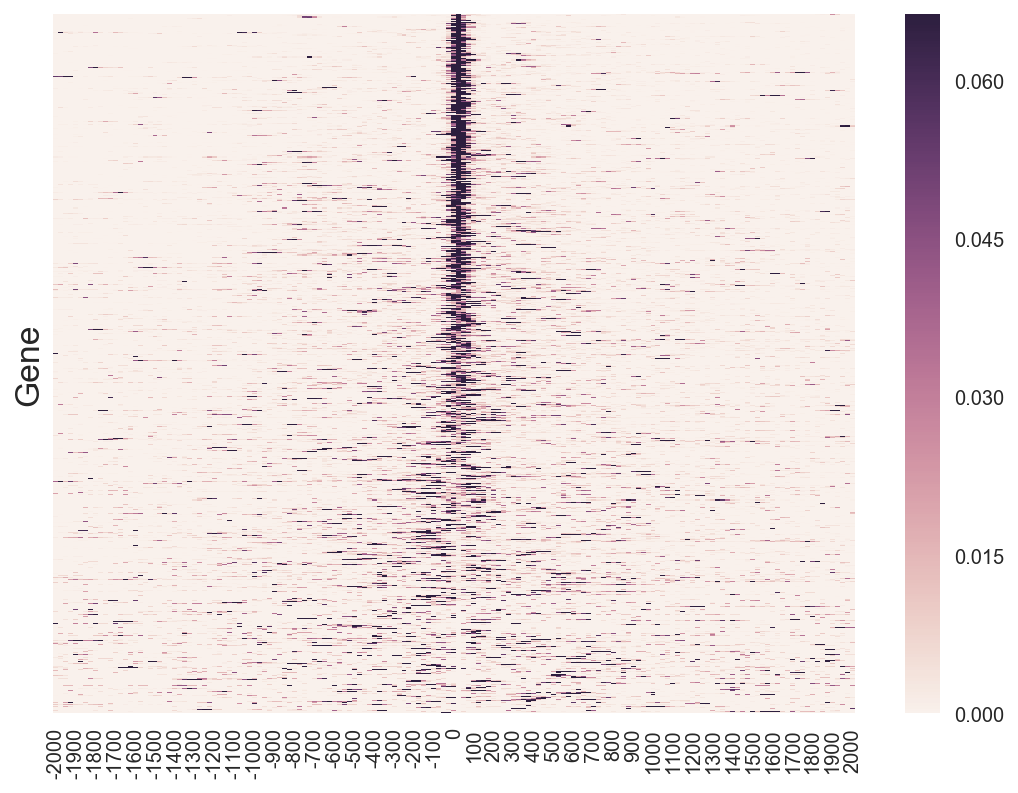

In [7]:
## Run without normalization
heat_df = heat_plot(output_file_exp+'MatS',is_norm=True,save_f = output_file_exp + '.heat.png' )
heat_df = heat_plot(output_file_mrna+'MatS',is_norm=True,save_f = output_file_mrna + '.heat.png' )

# Panel C. Nucleotide Sequences of Experimental TSS vs RefSeq TSS

## i. 

annotatePeaks.pl Results/Figures/Figure3/alt/A.TSS1_mrna /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 200 -hist 1 -di > Results/Figures/Figure3/alt/C_i_refseq.nuc_freq_200.txt


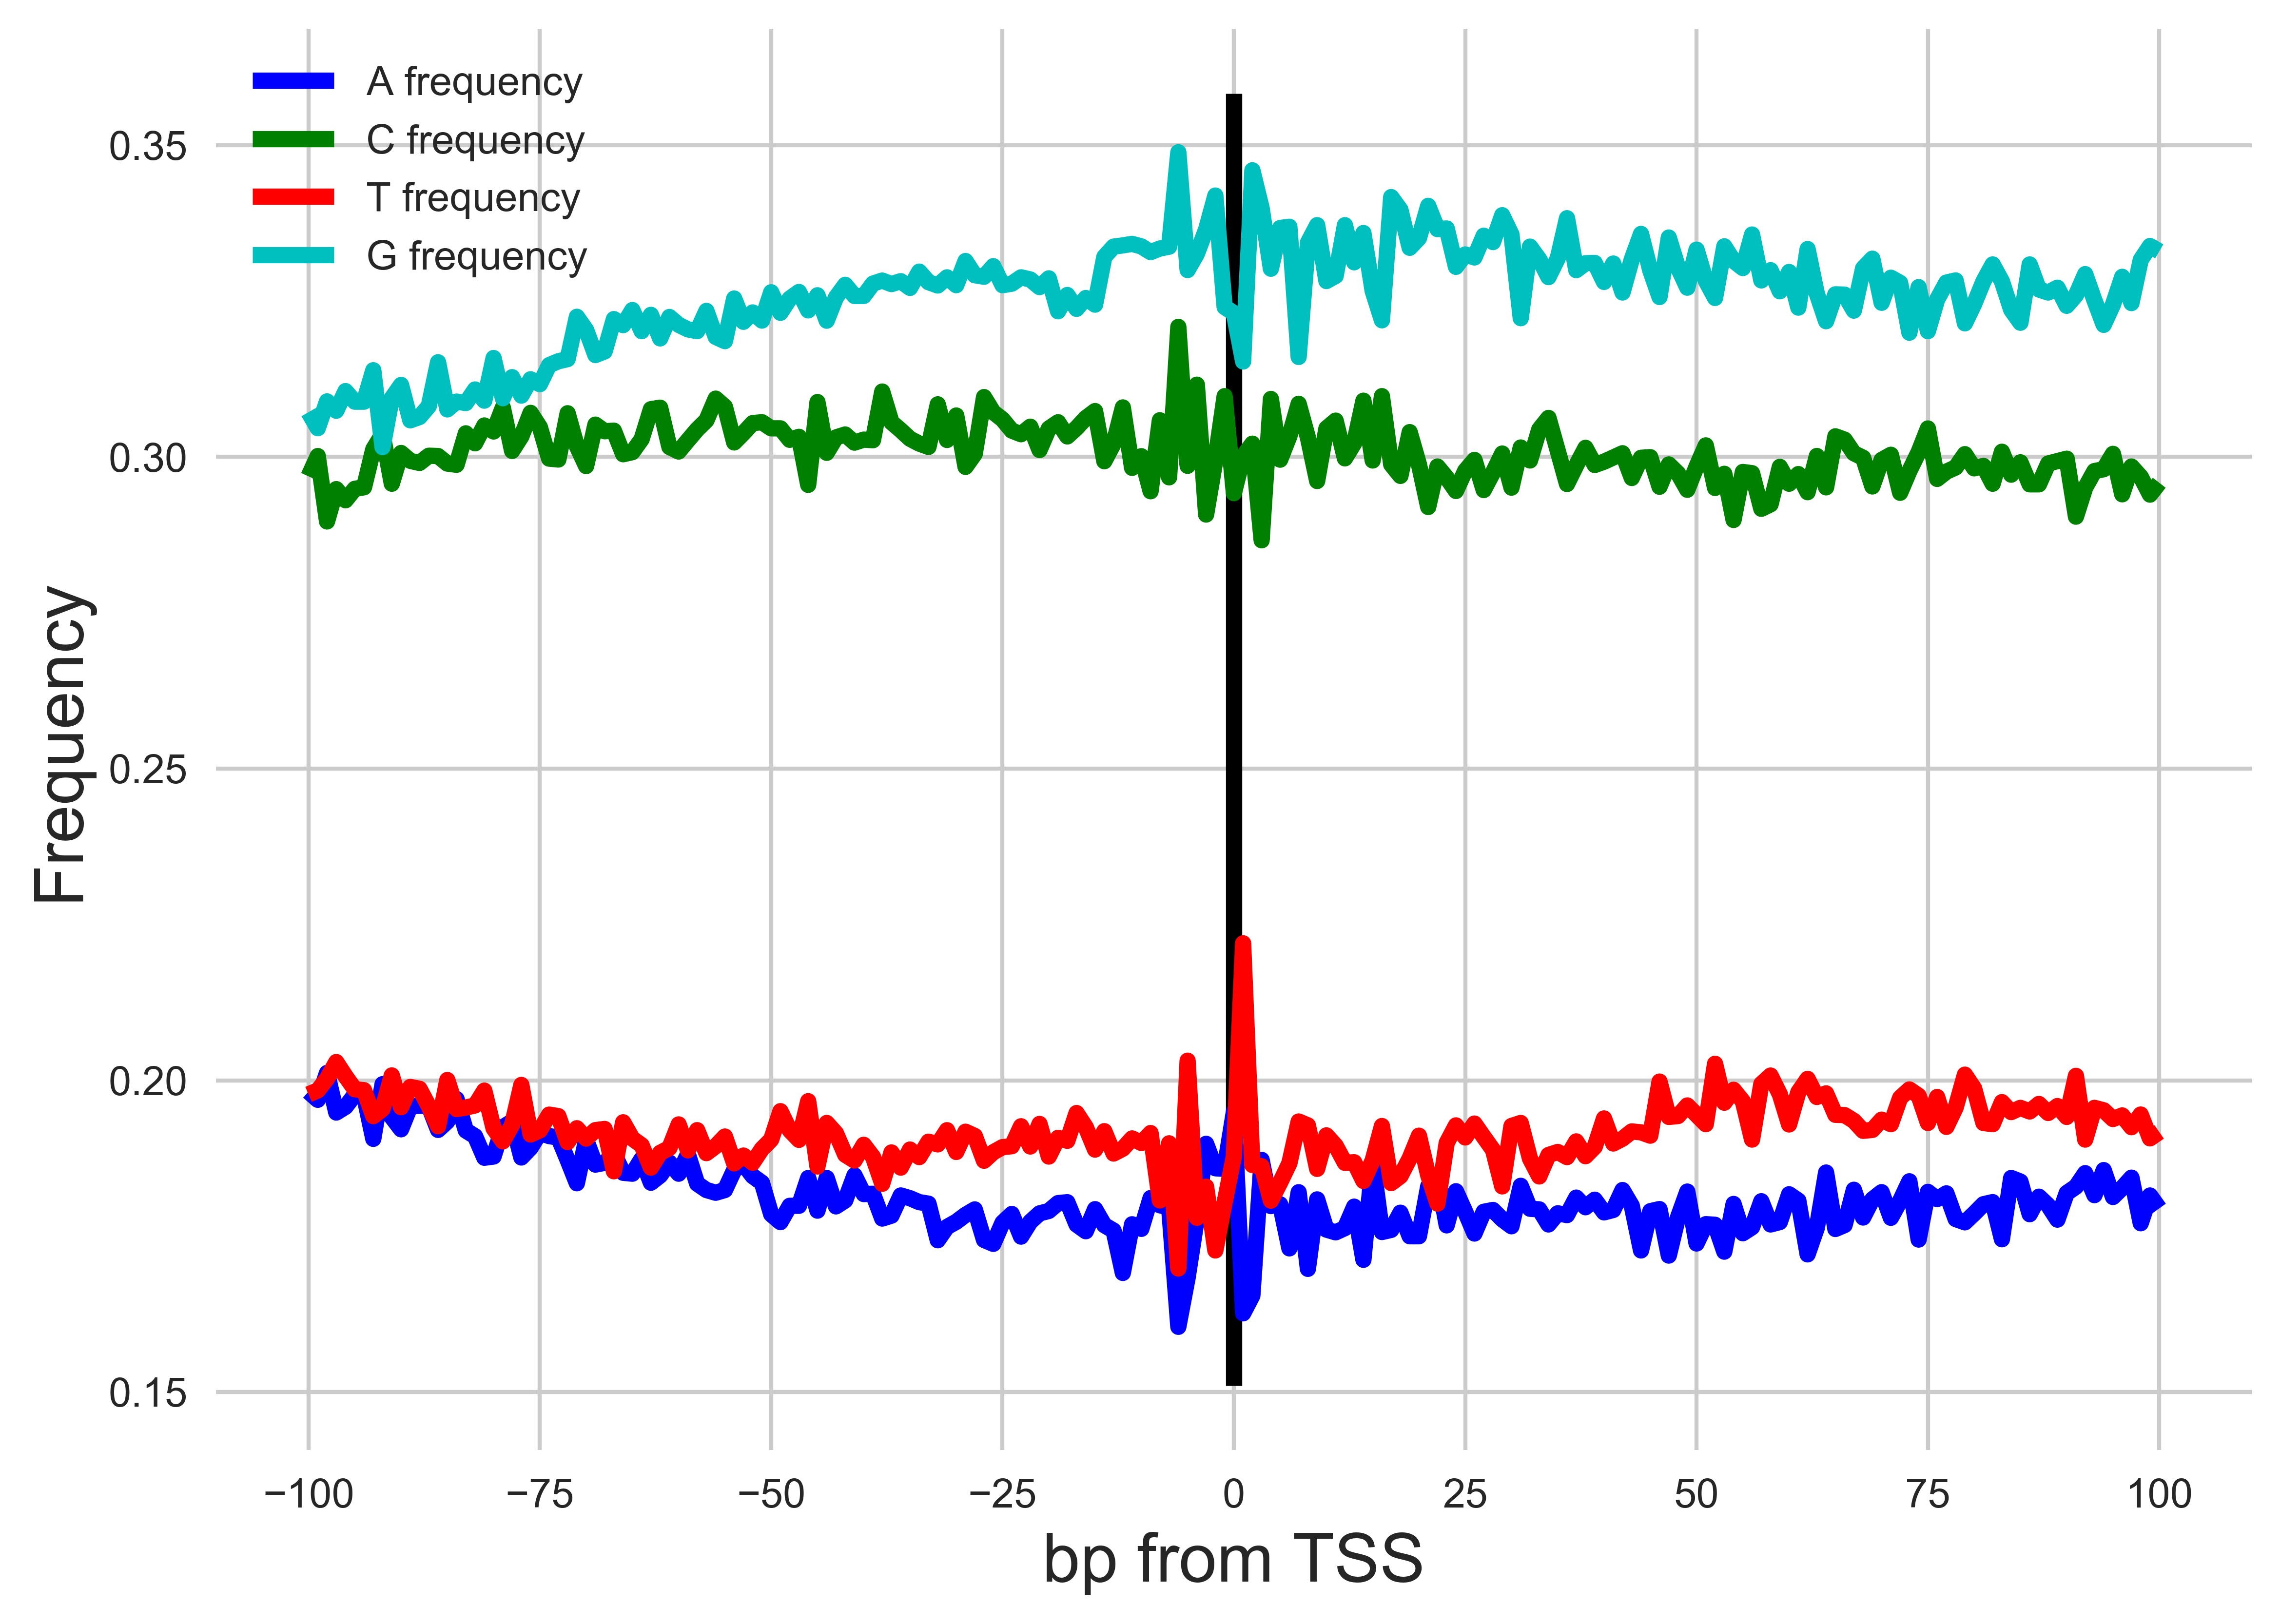

In [13]:
mrna_filt = "Results/Figures/Figure3/alt/A.TSS1_mrna"
homer_nucleotide(mrna_filt,
    'Results/Figures/Figure3/alt/C_i_refseq.nuc_freq_200.txt',
    ref_fa,
    size=200)

annotatePeaks.pl Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 200 -hist 1 -di > Results/Figures/Figure3/alt/C_i_exp.nuc_freq_200.txt


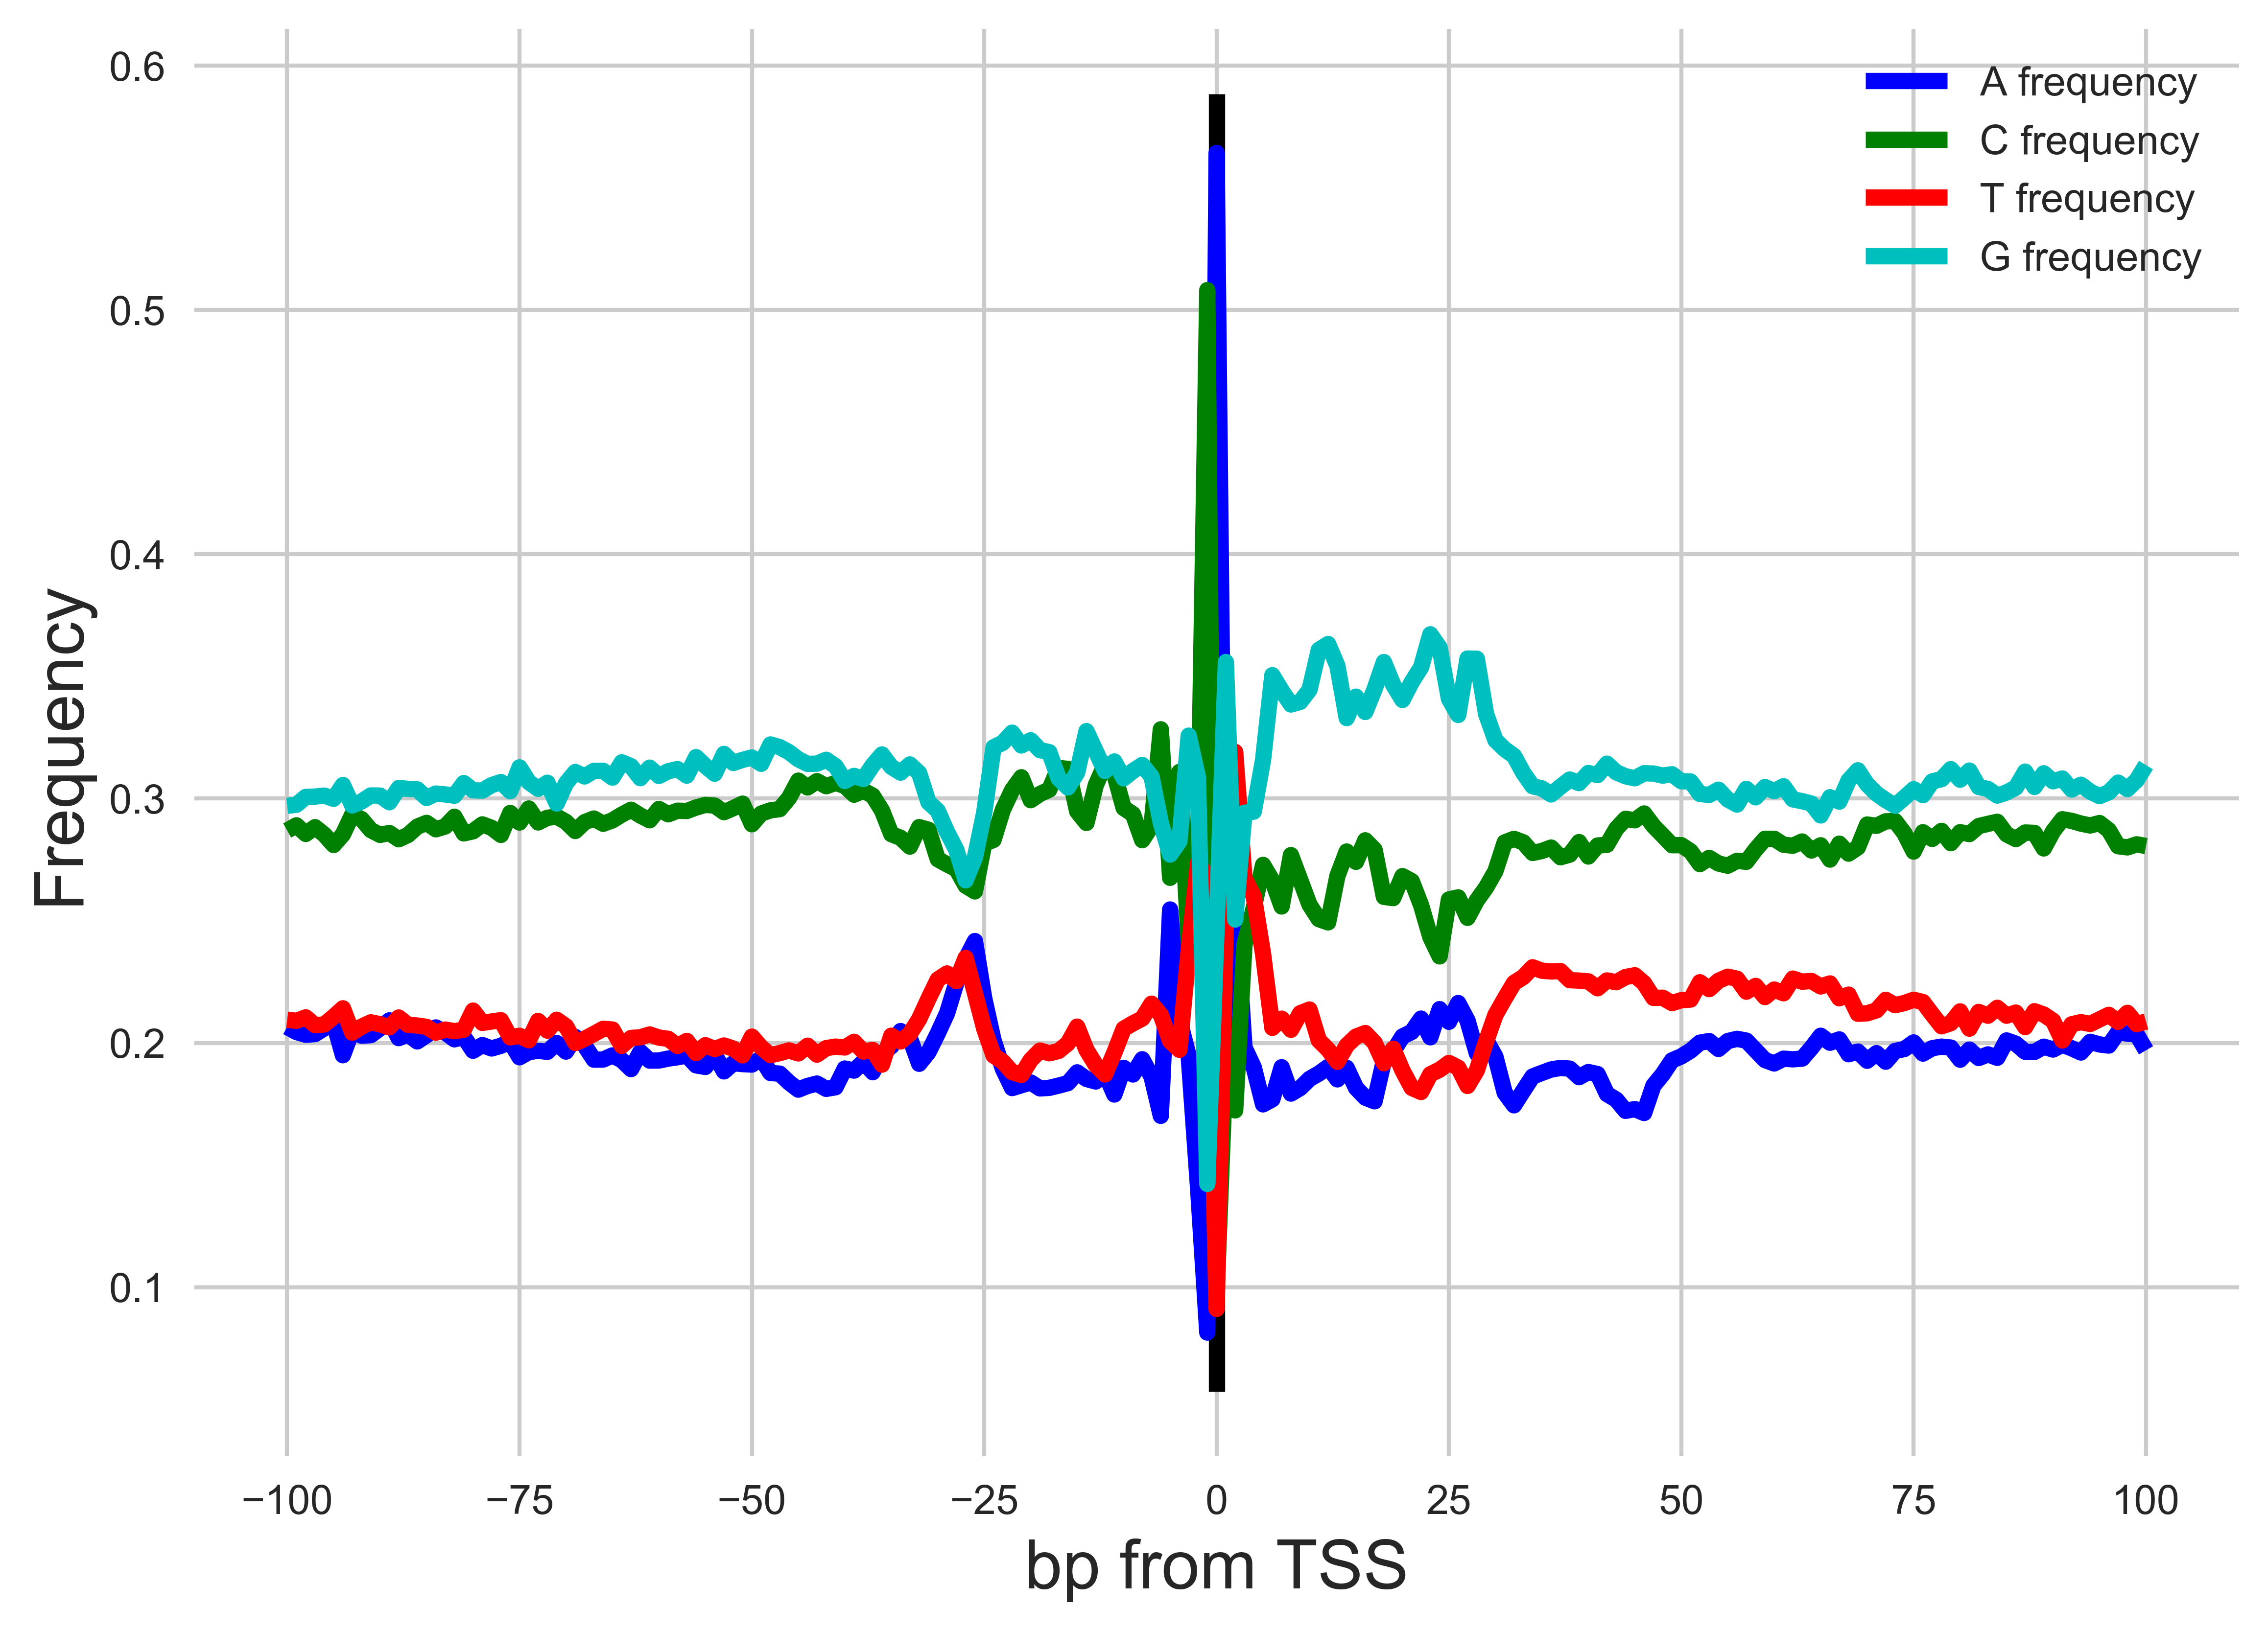

In [14]:
homer_nucleotide("Results/output/TSS1.exp.bed",
    'Results/Figures/Figure3/alt/C_i_exp.nuc_freq_200.txt',
    ref_fa,
    size=200)

annotatePeaks.pl Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -size 1000 -hist 1 -di > Results/Figures/Figure3/alt/C_i_exp.nuc_freq_1000.txt


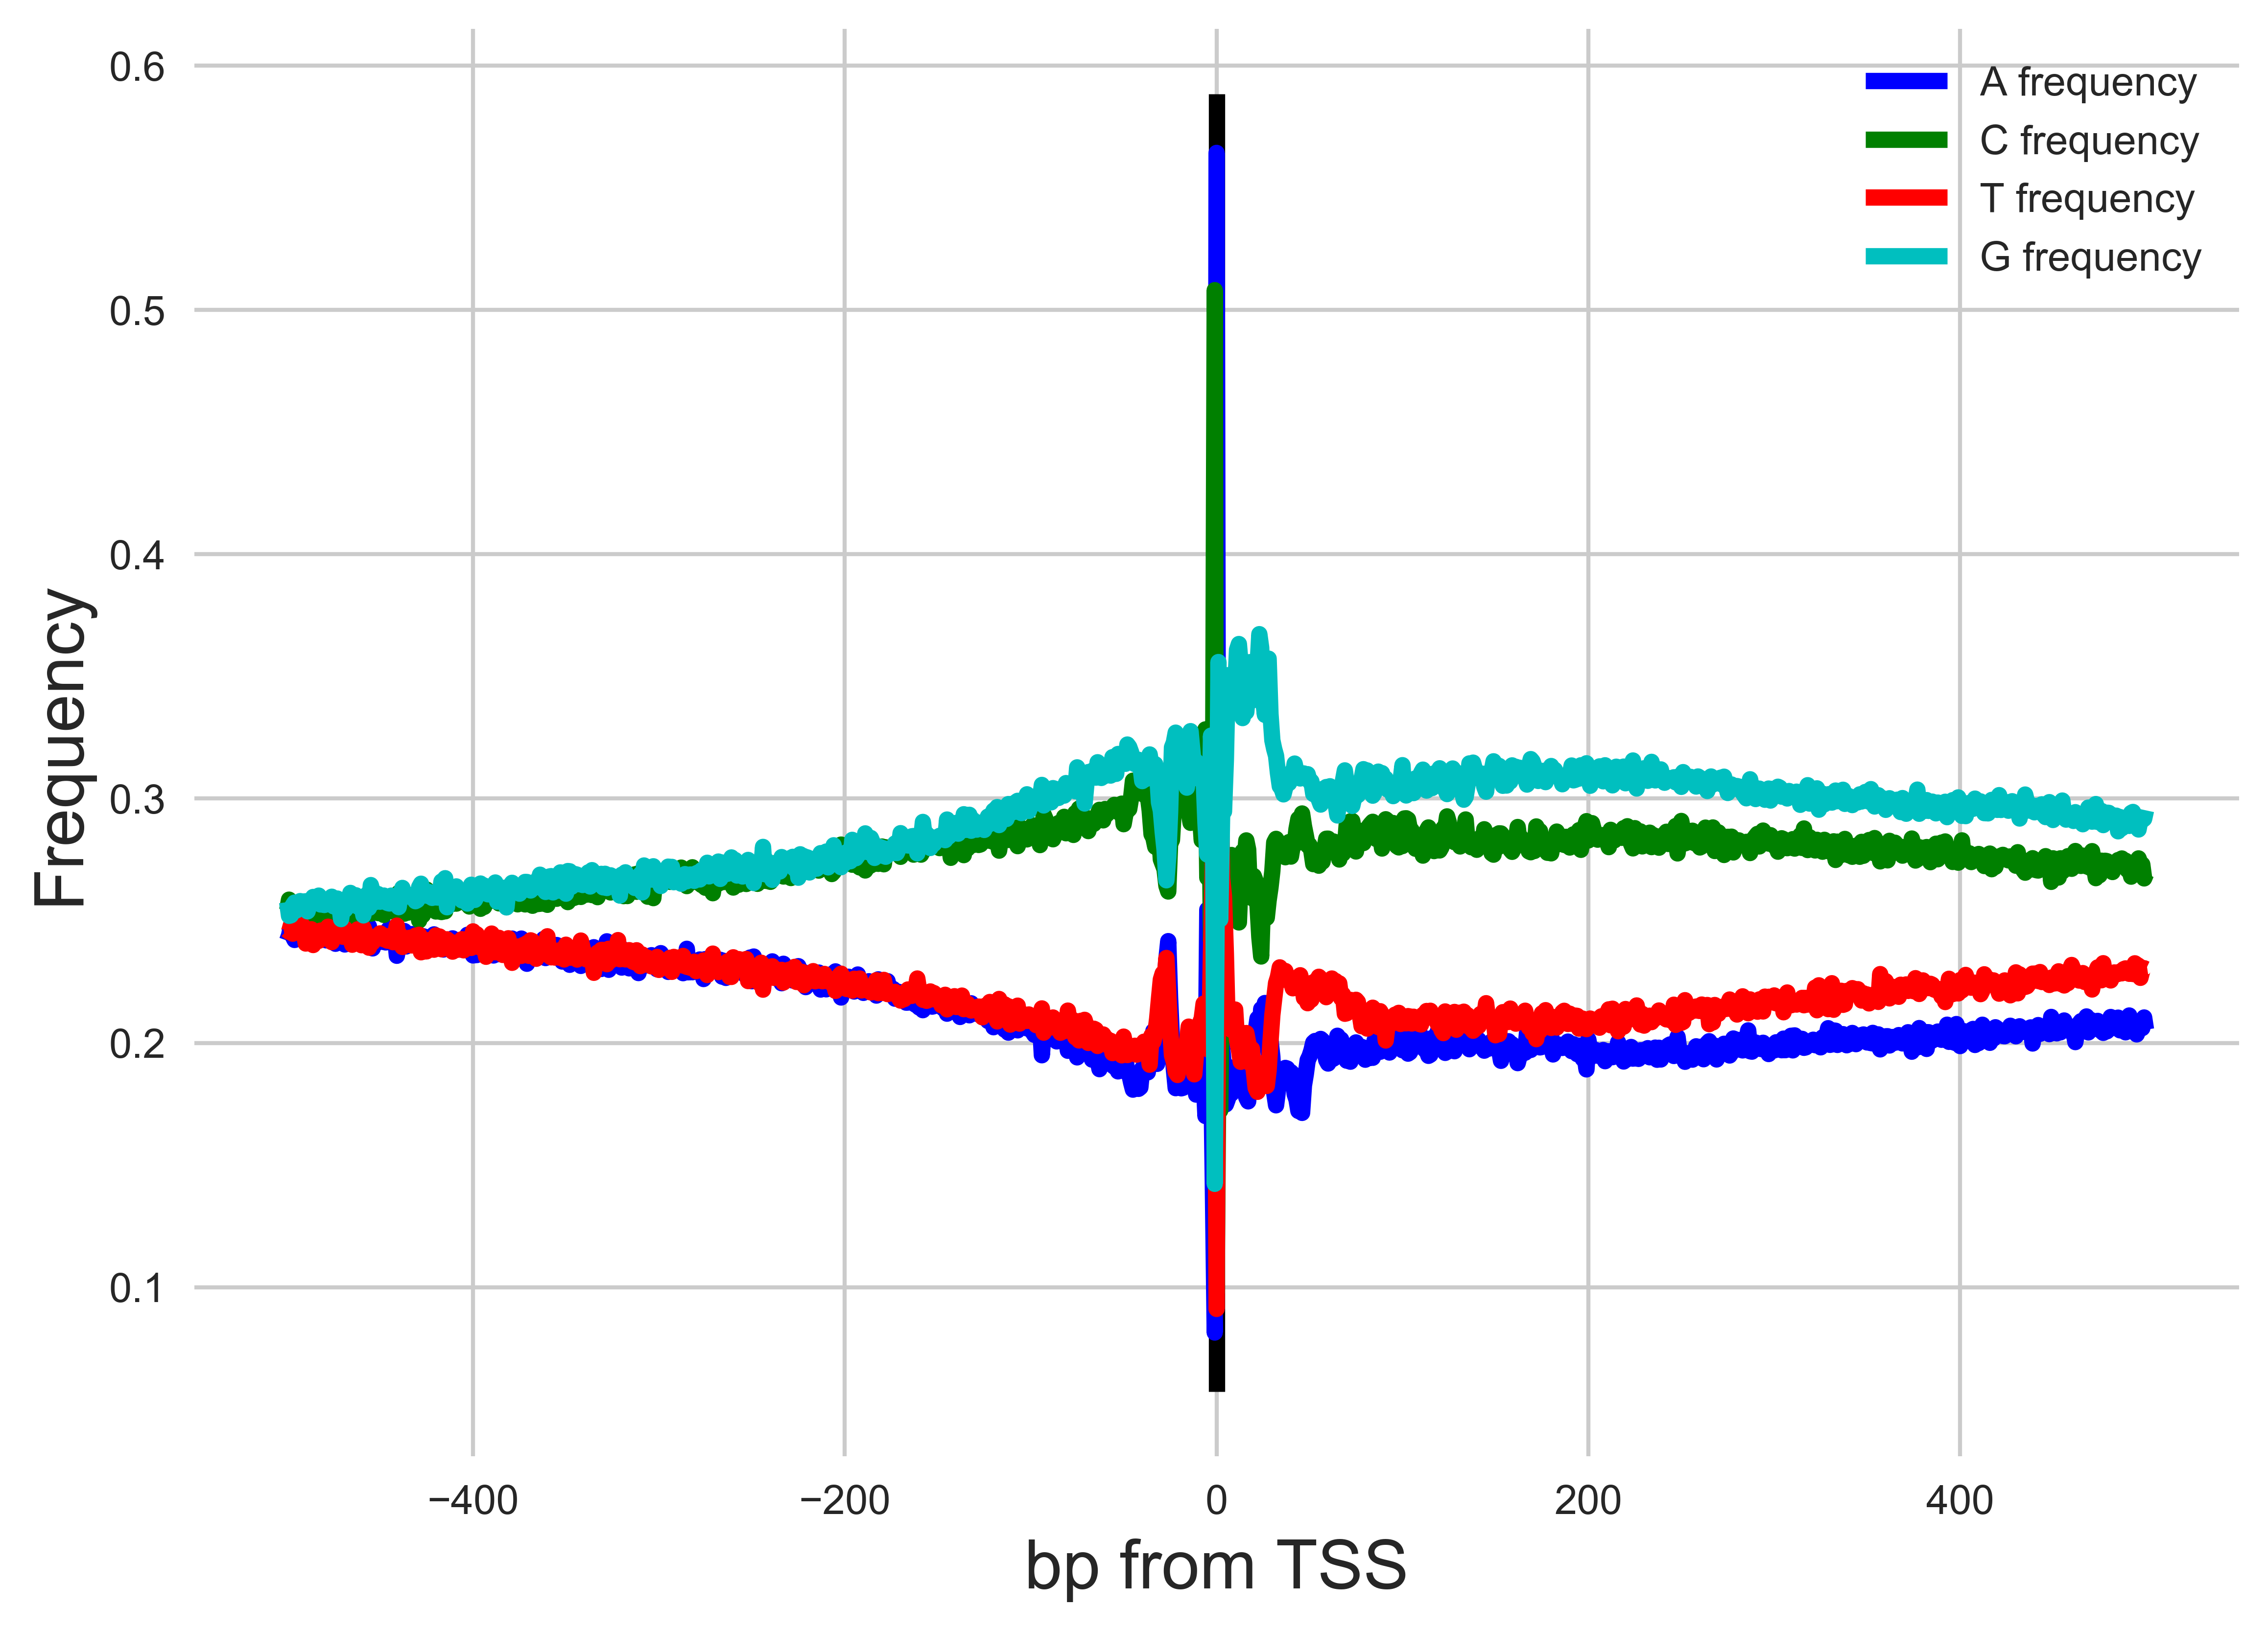

In [15]:
homer_nucleotide("Results/output/TSS1.exp.bed",
    'Results/Figures/Figure3/alt/C_i_exp.nuc_freq_1000.txt',
    ref_fa,
    size=1000)

In [ ]:
## Run without normalization
heat_df = heat_plot(output_file_exp+'MatS',is_norm=False,save_f = output_file_exp + '.noNorm.heat.png', num_peaks=100000 )
heat_df = heat_plot(output_file_mrna+'MatS',is_norm=False,save_f = output_file_mrna + '.noNorm.heat.png',num_peaks=100000 )

## With Normalizing

In [7]:
cmd = "annotatePeaks.pl Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d Results/merged/tags_TSS_merged > Results/Figures/Figure3/alt/A.exp.nopc.histNorm"
print(cmd)
!{cmd}

cmd = "annotatePeaks.pl Results/Figures/Figure3/A.TSS1_mrna /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d Results/merged/tags_TSS_merged > Results/Figures/Figure3/alt/A.TSS1_mrna.nopc.histNorm"
print(cmd)
!{cmd}

annotatePeaks.pl Results/output/TSS1.exp.bed /data/isshamie/genome/ncbi_anno_103/GCF_003668045.1_CriGri-PICR_genomic.fna -gff /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d Results/merged/tags_TSS_merged > Results/Figures/Figure3/alt/A.exp.nopc.histNorm

	Using Custom Genome
	Peak file = Results/output/TSS1.exp.bed
	Genome = GCF_003668045.1_CriGri-PICR_genomic.fna
	Organism = unknown
	Custom annotation GFF file: /data/isshamie/genome/ncbi_anno_103/alt_CriGri-PICR_top_level.gff3 (better to get GTF file)
	Fragment Length set to 1
	Peak Region set to 4000
	-----------------------------------------------------
	Histogram mode activated (bin size = 25 bp)
	-----------------------------------------------------
	Will normalize Tag histograms with minimum total of 100
	Tag Directories:
		Results/merged/tags_TSS_merged
	Peak/BED file conversion summary:
		BED/Header formatted lines: 30775
		peakfile formatted lines: 0
		Dupl

0.00350447796425
[-17.40426907  17.48972279]
Max value: 0.00700895592849
Full-width at half-maximum: 34.8939918596 (nts)
0.00225252071948
[ -7.78484227  66.45855248]
Max value: 0.00450504143895
Full-width at half-maximum: 74.2433947482 (nts)


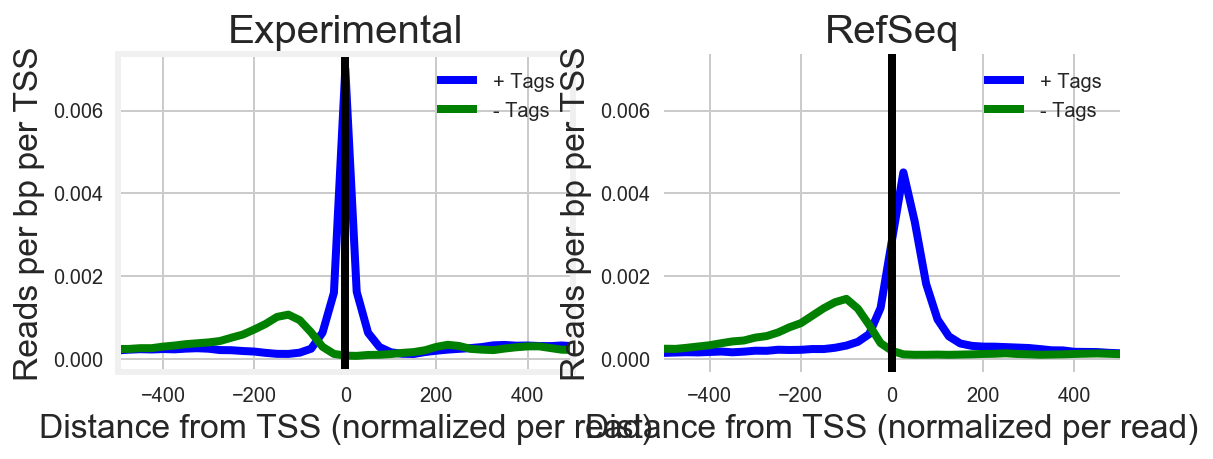

In [9]:
output_file_exp = "Results/Figures/Figure3/alt/A.exp.nopc.hist"
output_file_mrna = "Results/Figures/Figure3/alt/A.TSS1_mrna.nopc.hist"
hist_save= "Results/Figures/Figure3/alt/A.combine.norm.png"
wrap_hist_plot([output_file_exp ,
                output_file_mrna ], hist_save,
                    names=["Experimental","RefSeq"],to_norm=True)